In [2]:
# Movie data found on kaggle

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline     
matplotlib.rcParams['figure.figsize'] = (12, 8) # Customizing the configuration of the plots

# Import the dataset

df = pd.read_csv(r'C:\Users\jwild\OneDrive\Υπολογιστής\data_project\Project3\movies.csv')

In [3]:
# Looking at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# We will do some data cleaning
# Checking how many nulls here are in each collumn

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# We will drop the rows with missing values
df = df.dropna()

In [6]:
# Checking the data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Check for duplicates based on name and year
df[df.duplicated(subset = ['name', 'year']) == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [8]:
# We can use the following to see all the data
# pd.set_option('display.max_rows', None)
# df

In [9]:
# By scrolling through the data
# We can see some values in 'year' collumn are no the same with 'released' collumn
# We will make a new one with the correct values and drop the old

df['year_released'] = df.loc[:,'released'].str.extract(pat = '([0-9]{4})').astype(int)

C:\Users\jwild\AppData\Local\Temp/ipykernel_28052/2328636831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_released'] = df.loc[:,'released'].str.extract(pat = '([0-9]{4})').astype(int)


In [10]:
df.drop('year', axis=1, inplace=True)

C:\Users\jwild\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

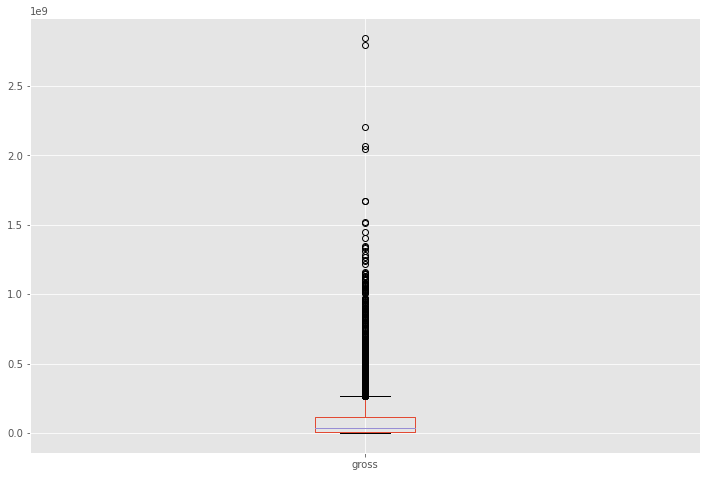

In [11]:
# Check for possible outliers

df.boxplot(column=['gross'])

In [12]:
# Now we will check the correlation of budget and gross

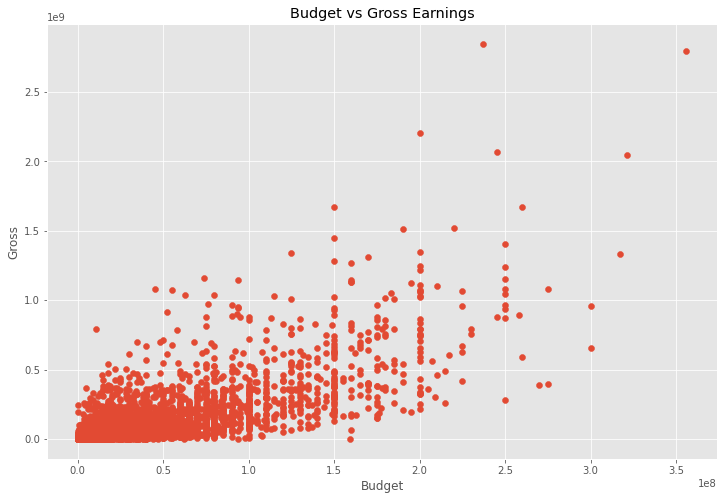

In [13]:
# Scatter plot budget vs gross


plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

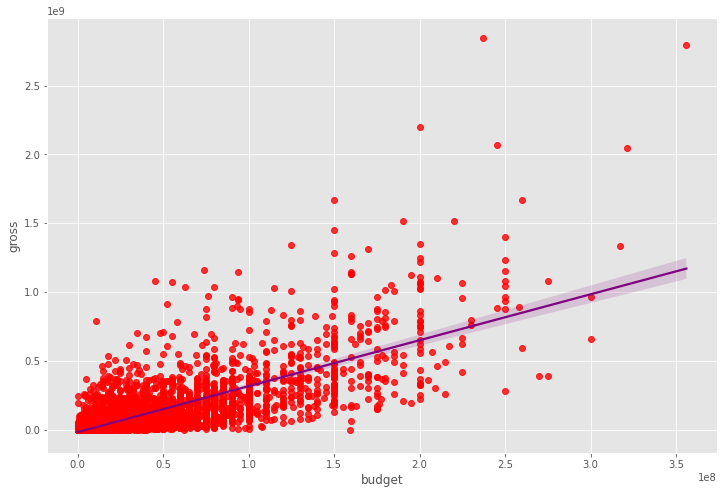

In [14]:
# Lets try a regression plot with seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'purple'})

In [15]:
# Lets look at correlations for collumns with numeric values
# Use pearson correlation

df.corr()

,score,votes,budget,gross,runtime,year_released
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_released,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


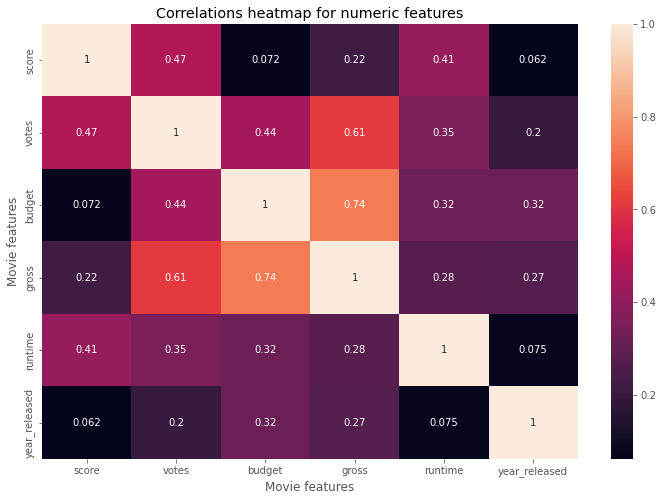

In [16]:
# Visualize the table

sns.heatmap(df.corr(), annot=True)

plt.title('Correlations heatmap for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [17]:
# Now we also want to see the correlations for numeric and non numeric values
# We can use cat.codes to give a unique number for each value in a collumn
# Those numbers are not random, they begin from 0 and are increasing with alphabetical order
# That should avoid false correlations

df_numerised = df.copy()
for col in df_numerised:
    if(df_numerised[col].dtype == 'object'):
        df_numerised[col] = df_numerised[col].astype('category')
        df_numerised[col] = df_numerised[col].cat.codes
df_numerised

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,4692,6,6,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0,1980
1,3929,6,1,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0,1980
2,3641,4,0,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0,1980
3,204,4,4,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0,1980
4,732,6,4,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,904,6.6,140000.0,16,2390,1812,47,90000000.0,426505244.0,452,124.0,2020
7649,3556,4,0,713,6.5,102000.0,852,2309,147,47,85000000.0,319715683.0,1108,99.0,2020
7650,1153,4,1,904,5.6,53000.0,1809,2827,1470,47,175000000.0,245487753.0,1397,101.0,2020
7651,3978,4,1,758,6.8,42000.0,294,2091,640,6,135000000.0,111105497.0,12,100.0,2020


In [18]:
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020


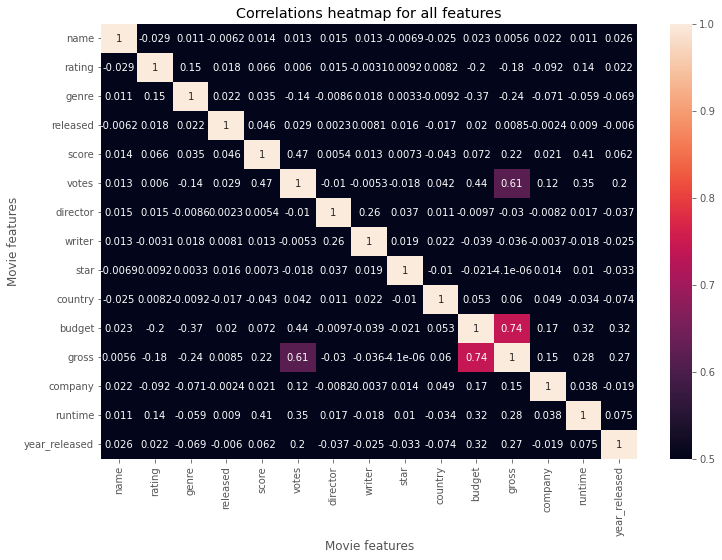

In [19]:
# Now we want to see which collumns have correlation at least .5

sns.heatmap(df_numerised.corr(), vmin=0.5, annot=True)

plt.title('Correlations heatmap for all features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [20]:
# gross-budget and gross-votes are still the highest correlated collumns

<AxesSubplot:xlabel='genre', ylabel='budget'>

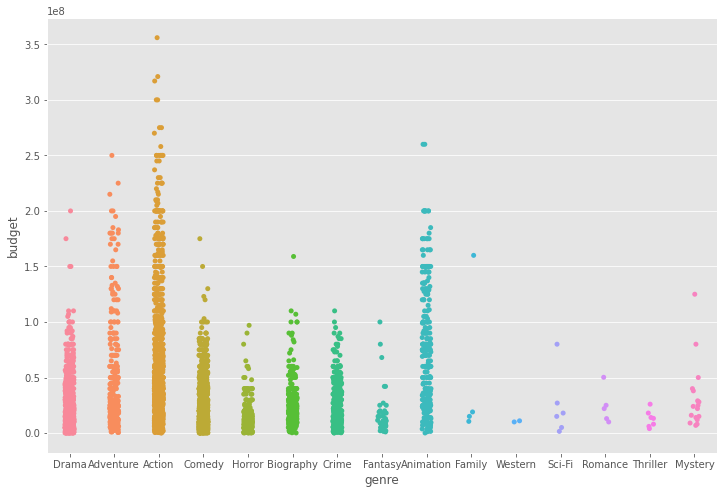

In [21]:
# Lets look at budget in relation with genre

sns.stripplot(x="genre", y="budget", data=df)

In [22]:
# There are some surprising high budget for animation films lets find the top 5

df[df['genre']=='Animation'].sort_values(by='budget', axis=0, ascending=False).head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5658,Tangled,PG,Animation,"November 24, 2010 (United States)",7.7,417000.0,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000.0,5.924628e+08,Walt Disney Animation Studios,100.0,2010
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0,2019
5883,Cars 2,G,Animation,"June 24, 2011 (United States)",6.1,168000.0,John Lasseter,John Lasseter,Owen Wilson,United States,200000000.0,5.598524e+08,Walt Disney Pictures,106.0,2011
6267,Monsters University,G,Animation,"June 21, 2013 (United States)",7.2,332000.0,Dan Scanlon,Dan Scanlon,Billy Crystal,United States,200000000.0,7.435596e+08,Walt Disney Pictures,104.0,2013
6707,The Good Dinosaur,PG,Animation,"November 25, 2015 (United States)",6.7,106000.0,Peter Sohn,Bob Peterson,Jeffrey Wright,United States,200000000.0,3.322077e+08,Pixar Animation Studios,93.0,2015


<AxesSubplot:xlabel='genre', ylabel='gross'>

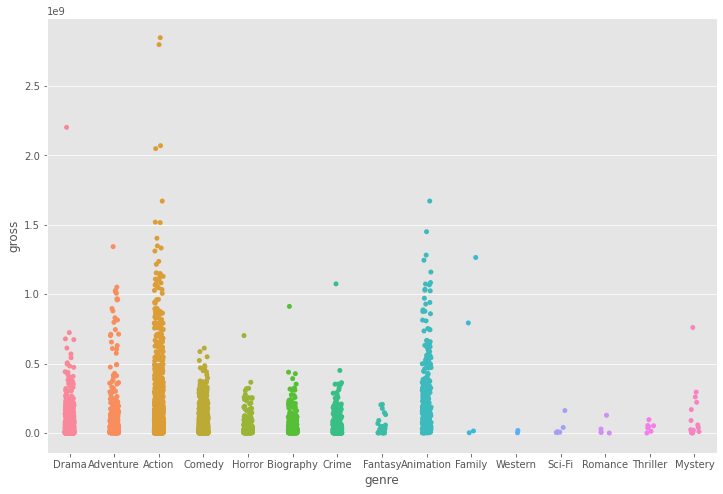

In [23]:
# Now lets look genre and gross

sns.stripplot(x="genre", y="gross", data=df)

In [24]:
# Which is the drama outlier?
# Of course its titanic

df[df['genre']=='Drama'].sort_values(by='gross', axis=0, ascending=False).head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6251,Gravity,PG-13,Drama,"October 4, 2013 (United States)",7.7,784000.0,Alfonso Cuarón,Alfonso Cuarón,Sandra Bullock,United Kingdom,100000000.0,7.231927e+08,Warner Bros.,91.0,2013
2445,Forrest Gump,PG-13,Drama,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000.0,6.782261e+08,Paramount Pictures,142.0,1994
3453,The Sixth Sense,PG-13,Drama,"August 6, 1999 (United States)",8.1,930000.0,M. Night Shyamalan,M. Night Shyamalan,Bruce Willis,United States,40000000.0,6.728063e+08,Hollywood Pictures,107.0,1999
4480,The Passion of the Christ,R,Drama,"February 25, 2004 (United States)",7.2,221000.0,Mel Gibson,Benedict Fitzgerald,Jim Caviezel,United States,30000000.0,6.120545e+08,Icon Productions,127.0,2004


In [25]:
# Im thinking a mystery movie tonigth, R rated with 8 or more score

df[(df['genre']=='Mystery') & (df['rating']=='R' ) & (df['score']>=8.0)]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
2659,12 Monkeys,R,Mystery,"January 5, 1996 (United States)",8.0,589000.0,Terry Gilliam,Chris Marker,Bruce Willis,United States,29000001.0,168839459.0,Universal Pictures,129.0,1996
3648,Memento,R,Mystery,"May 25, 2001 (United States)",8.4,1200000.0,Christopher Nolan,Christopher Nolan,Guy Pearce,United States,9000000.0,40047078.0,Newmarket Capital Group,113.0,2001
5645,Shutter Island,R,Mystery,"February 19, 2010 (United States)",8.2,1200000.0,Martin Scorsese,Laeta Kalogridis,Leonardo DiCaprio,United States,80000000.0,294805697.0,Paramount Pictures,138.0,2010


In [26]:
# 12 Monkeys it is